<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-данных-из-файла" data-toc-modified-id="Изучение-данных-из-файла-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение данных из файла</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Предварительный-анализ-данных" data-toc-modified-id="Предварительный-анализ-данных-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Предварительный анализ данных</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Анализ-данных-и-проверка-гипотез" data-toc-modified-id="Анализ-данных-и-проверка-гипотез-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Анализ данных и проверка гипотез</a></span><ul class="toc-item"><li><span><a href="#Общие-тенденции-рынка" data-toc-modified-id="Общие-тенденции-рынка-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Общие тенденции рынка</a></span></li><li><span><a href="#Влияние-ревью-и-пользовательских-оценок" data-toc-modified-id="Влияние-ревью-и-пользовательских-оценок-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Влияние ревью и пользовательских оценок</a></span></li><li><span><a href="#Анализ-продаж-(все-регионы)" data-toc-modified-id="Анализ-продаж-(все-регионы)-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Анализ продаж (все регионы)</a></span></li><li><span><a href="#Анализ-продаж-(Северная-Америка)" data-toc-modified-id="Анализ-продаж-(Северная-Америка)-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Анализ продаж (Северная Америка)</a></span></li><li><span><a href="#Анализ-продаж-(Европа)" data-toc-modified-id="Анализ-продаж-(Европа)-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>Анализ продаж (Европа)</a></span></li><li><span><a href="#Анализ-продаж-(Япония)" data-toc-modified-id="Анализ-продаж-(Япония)-4.6"><span class="toc-item-num">4.6&nbsp;&nbsp;</span>Анализ продаж (Япония)</a></span></li><li><span><a href="#Проверка-статистических-гипотез" data-toc-modified-id="Проверка-статистических-гипотез-4.7"><span class="toc-item-num">4.7&nbsp;&nbsp;</span>Проверка статистических гипотез</a></span></li></ul></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Вывод</a></span></li></ul></div>

# Исследование рынка видеоигр

Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.

## Изучение данных из файла

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats as st

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('/datasets/games.csv')

display(df.info()) # Получаем общую информацию о базе
display(df.head(20))

# Берем из старого проекта функцию для оценки количества пропущенных значений во всем датафрейме или в отдельном столбце

def check_na(df, column_to_check = None):    
    if column_to_check is None: check_list = df.columns
    else: 
        check_list = [column_to_check]        
    for column in check_list:        
        null_values = df[column].isna().sum()
        overall_values = df[column].count() + null_values
        percentage = round(null_values / overall_values * 100,2)
        print(f'Пропущенных значений {column}: {null_values} из {overall_values} ({percentage}%)')

check_na(df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


None

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


Пропущенных значений Name: 2 из 16715 (0.01%)
Пропущенных значений Platform: 0 из 16715 (0.0%)
Пропущенных значений Year_of_Release: 269 из 16715 (1.61%)
Пропущенных значений Genre: 2 из 16715 (0.01%)
Пропущенных значений NA_sales: 0 из 16715 (0.0%)
Пропущенных значений EU_sales: 0 из 16715 (0.0%)
Пропущенных значений JP_sales: 0 из 16715 (0.0%)
Пропущенных значений Other_sales: 0 из 16715 (0.0%)
Пропущенных значений Critic_Score: 8578 из 16715 (51.32%)
Пропущенных значений User_Score: 6701 из 16715 (40.09%)
Пропущенных значений Rating: 6766 из 16715 (40.48%)


### Вывод

Мы загрузили датафрейм, включающий в себя <b>16715</b> строк. В нем представлена информация о продажах видеоигр. Каждая строчка - одна видеоигра, характеризующаяся следующими показателями:
   - Название
   - Платформа (категориальная переменная)
   - Год выпуска (количественная переменная)
   - Жанр (категориальная переменная)
   - Продажи в Северной Америке, Европе, Японии и других регионах (количественная переменная)
   - Средняя пользовательская оценка (количественная переменная)
   - Средняя оценка критиков (количественная переменная)
   - Рейтинг ESRB (категорильная переменная)

Проанализировав данные методом <b>info()</b> и самостоятельно написанной функцией <b>check_na()</b> мы обращаем внимание на следующие проблемы с данными, которые нам предстоит исправить на этапе предобоработки:
   - Необходимо привести названия столбцов к нижнему регистру
   - Присутствуют пропуски в столбцах <b>Name, Year_of_Release, Genre, Critic_score, User_Score и Rating</b>
   - Требуется замена типов данных в столбцах <b>Year_of_Release</b> (с float на int) и <b>User_score</b> (с object на float)

## Предобработка данных

In [3]:
df.columns = df.columns.str.lower()
# приводим названия столбцов к нижнему регистру

In [4]:
print('Количество дубликатов: ', df.duplicated().sum())
# проверяем наличие дубликатов в данных

Количество дубликатов:  0


In [5]:
df.dropna(subset = ['genre', 'year_of_release'], inplace = True)
# удаляем строки с пустыми жанром и годом выпуска: эти данные критичны для последующего анализа
# кроме того, объем пропущенных данных невелик - 1.62% от общего объема

display(df['user_score'].value_counts())
display(df[df['user_score'] == 'tbd'].head(30))
# изучаем строки с пользовательским рейтингом 'tbd'

df['year_of_release'] = df['year_of_release'].astype(int) 
df['user_score'] = pd.to_numeric(df['user_score'], errors = 'coerce') 
# переводим user_score в тип float с заменой текстовых ячеек на пропуски

df['total_sales'] = sum([df[j + '_sales'] for j in ['na','eu','jp','other']])
# добавляем столбец total_sales с суммарными продажами по всем регионам

tbd    2376
7.8     322
8       285
8.2     276
8.3     252
       ... 
1.3       2
1         2
1.1       2
9.7       1
0         1
Name: user_score, Length: 96, dtype: int64

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010.0,Sports,3.45,2.59,0.00,0.66,NaN,tbd,E
301,Namco Museum: 50th Anniversary,PS2,2005.0,Misc,2.08,1.35,0.00,0.54,61.0,tbd,E10+
520,Zumba Fitness 2,Wii,2011.0,Sports,1.51,1.03,0.00,0.27,NaN,tbd,T
645,uDraw Studio,Wii,2010.0,Misc,1.65,0.57,0.00,0.20,71.0,tbd,E
718,Just Dance Kids,Wii,2010.0,Misc,1.52,0.54,0.00,0.18,NaN,tbd,E
726,Dance Dance Revolution X2,PS2,2009.0,Simulation,1.09,0.85,0.00,0.28,NaN,tbd,E10+
821,The Incredibles,GBA,2004.0,Action,1.15,0.77,0.04,0.10,55.0,tbd,E
881,Who wants to be a millionaire,PC,1999.0,Misc,1.94,0.00,0.00,0.00,NaN,tbd,E
1047,Tetris Worlds,GBA,2001.0,Puzzle,1.25,0.39,0.00,0.06,65.0,tbd,E
1048,Imagine: Teacher,DS,2008.0,Simulation,0.70,0.82,0.00,0.19,NaN,tbd,E


In [6]:
# проверяем предобработку

display(df.info())
check_na(df)
df['user_score'].describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 12 columns):
name               16444 non-null object
platform           16444 non-null object
year_of_release    16444 non-null int64
genre              16444 non-null object
na_sales           16444 non-null float64
eu_sales           16444 non-null float64
jp_sales           16444 non-null float64
other_sales        16444 non-null float64
critic_score       7983 non-null float64
user_score         7463 non-null float64
rating             9768 non-null object
total_sales        16444 non-null float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.6+ MB


None

Пропущенных значений name: 0 из 16444 (0.0%)
Пропущенных значений platform: 0 из 16444 (0.0%)
Пропущенных значений year_of_release: 0 из 16444 (0.0%)
Пропущенных значений genre: 0 из 16444 (0.0%)
Пропущенных значений na_sales: 0 из 16444 (0.0%)
Пропущенных значений eu_sales: 0 из 16444 (0.0%)
Пропущенных значений jp_sales: 0 из 16444 (0.0%)
Пропущенных значений other_sales: 0 из 16444 (0.0%)
Пропущенных значений critic_score: 8461 из 16444 (51.45%)
Пропущенных значений user_score: 8981 из 16444 (54.62%)
Пропущенных значений rating: 6676 из 16444 (40.6%)
Пропущенных значений total_sales: 0 из 16444 (0.0%)


count    7463.000000
mean        7.126330
std         1.499447
min         0.000000
25%         6.400000
50%         7.500000
75%         8.200000
max         9.700000
Name: user_score, dtype: float64

In [7]:
df['rating'].fillna('Unknown', inplace = True)
check_na(df,'rating')

Пропущенных значений rating: 0 из 16444 (0.0%)


### Вывод

В ходе предобработки данных мы произвели следующие манипуляции с базой:
 - Привели названия столбцов к нижнему регистру
 - Заменили тип данных столбцов <b>year_of_release</b> и <b>user_score</b>
 - Устранили строки с пропущенными жанром и годом выпуска. Эти данные являются ключевыми для нашего анализа, при этом объем пропусков невелик (<b>1.62%</b>). Поэтому мы принимаем решение избавиться от пропусков, вместо заполнения его медианой или пустыми значениями.

При этом мы предпочли проигнорировать следующие пропуски:
 - Пропуски в столбцах <b>critic_score</b>, <b>user_score</b> и <b>rating</b> присутствуют в слишком большом количестве (<b>от 40% до 50%</b>), чтобы заполнять их медианными значениями - это бы сильно исказило результаты исследования (тем более мы планируем делать статистический тест по этим данным). Кроме того, данные о рейтингах и оценках понадобятся нам лишь ближе к финалу проекта и мы легко сможем избавиться от пропусков на нужном этапе. Для основного анализа эти пропуски никак нам не мешают. Принимаем решение не трогать эти данные.
 - В ходе анализа данных не удалось выявить какие-либо заметные тенденции, провидящие к появлению значения 'tbd' в столбце <b>user_score</b> - все остальные данные в таких строках в норме. Скорее всего статуc 'to be determined' имеет игра, не получавшая отзывов от пользователей. Вместе с тем, это может быть связано с недостаточно качественным парсингом данных или с необходимостью замены источника пользовательских оценок. Рекомендуется провести работу в этом направлении.
 - Мы проанализировали распределение данных в графе <b>total_sales</b> на предмет выбросов, сформировав график "ящик" с усами, и обнаружили очень большое количество значений за пределами интервала в 1.5 IQR. Однако такой разброс в продажах может быть характерен для творческой сферы, ввиду ее "пестрости" и разнообразия: в выборку попадают как игры от маленьких инди-студий, так и хиты от международных гигантов. Максимальное значение: <b>80 млн копий</b> игры <b>Wii Sports</b> - достаточно достоверная цифра, поэтому мы не можем с уверенностью заявлять о наличии в датафрейме статистических выбросов. Т.о. мер по борьбе с выбросами мы в данном случае предпринимать не будем.
 

## Предварительный анализ данных

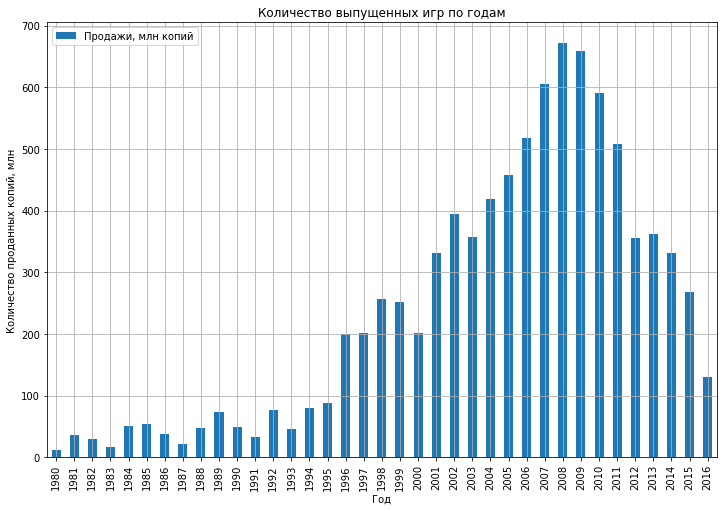

In [8]:
df_years_overall = pd.pivot_table(df, index = 'year_of_release', values = 'total_sales', aggfunc = 'sum')

ax = df_years_overall.plot(figsize = (12,8), title = 'Продажи игр с ТОП-5 платформ', kind = 'bar')
ax.set_title('Количество выпущенных игр по годам')
ax.grid()
ax.set_xlabel('Год')
ax.set_ylabel('Количество проданных копий, млн')
ax.legend(['Продажи, млн копий'])
plt.show()   

На графике мы отчетливо видим 2 точки, с которых стартует взрывной рост рынка видеоигр: это <b>1992</b> и <b>2000 год</b>. При этом пик продаж пришелся на <b>2008 год</b>.

Оценим динамику продаж игр в разных регионах, начиная с пика в 2008 году

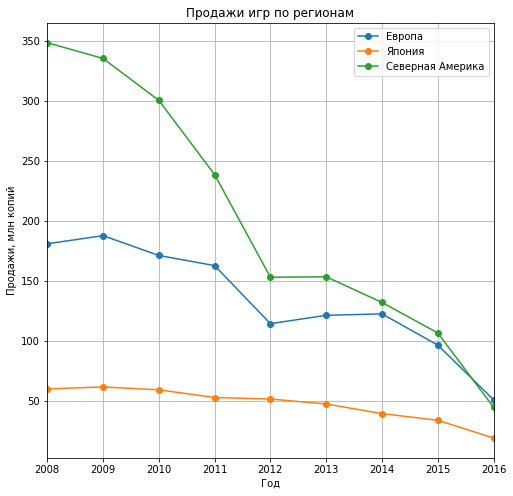

In [9]:
df_regions = df.query('year_of_release >= 2008').pivot_table(index = 'year_of_release', values = ['jp_sales','na_sales','eu_sales'], aggfunc = 'sum')
ax = df_regions.plot(figsize = (8,8), title = 'Продажи игр по регионам', grid = True, style = 'o-')
ax.set_xlabel('Год')
ax.set_ylabel('Продажи, млн копий')
ax.legend(['Европа','Япония','Северная Америка'])

Как мы видим, падение объемов продаж происходит во всех регионах. Спад практически равномерный - возможно, он связан со сменой поколений устройств (люди не хотят играть на устаревшем "железе", но пока не успели приобрести "обновку"), либо с переходом аудитории в мобильный гейминг. При этом интерес геймеров к новым тайтлам в Северной Америке и Европе падает гораздо быстрее, чем в Японии. При сохранении тренда можно ожидать, что в 2017-2018 годах объем продаж игр в Японии будет выше, чем в Европе и Северной Америке.

Теперь попробуем оценить продажи с 2008 года в разрезе игровых платформ, чтобы оценить текущую ситуацию с железом (что является одним из ключевых факторов, влияющих на положение дел в игровой индустрии) и срок жизни поколений платформ.

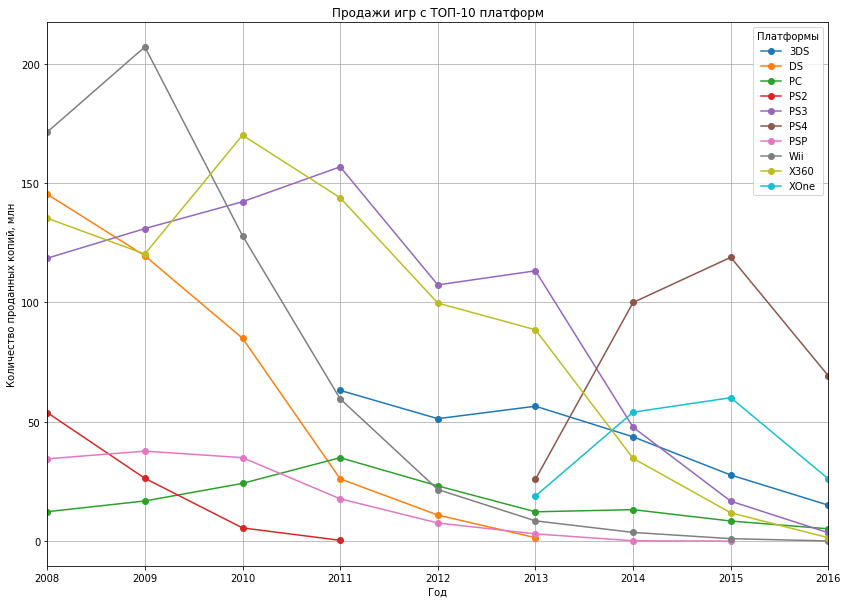

In [10]:
df_2000 = df.query('year_of_release >= 2008')

df_platforms = pd.pivot_table(df_2000, index = 'platform', values = ['total_sales'], aggfunc = 'sum')['total_sales'].sort_values(ascending = False)

df_top_platforms = set(df_platforms[0:10].index)

df_years = pd.pivot_table(df_2000.query('platform.isin(@df_top_platforms)'), index = 'year_of_release', columns = 'platform', values = 'total_sales', aggfunc = 'sum')


ax = df_years.plot(figsize = (14,10), grid = True, title = 'Продажи игр с ТОП-10 платформ', style = 'o-')
ax.set_xlabel('Год')
ax.set_ylabel('Количество проданных копий, млн')
ax.legend(title='Платформы')

### Вывод

По графику видно, что современная игровая платформа является актуальной в среднем 10 лет. Этот период включает полный цикл жизни устройства: как первичный рост продаж, так и постепенное угасение интереса к ней с переходом пользователей на другие платформы.

По постоянию на 2016 год в разрезе игровых платформ мы наблюдаем следующие тренды:
 - TOP3 консоли: <b>PS4</b>, <b>Xbox One</b> и <b>3DS</b>
 - Среди ТОП-3 консолей "растущих" всего 2: <b>PS4</b> и <b>Xbox One</b>. Их продажи стартовали в 2013 году. При этом динамика роста продаж игр для этих консолей практически идентична динамике падения продаж консолей-предшественниц: <b>Xbox 360</b> и <b>PS3</b>, т.е. одна консоль заменяет другую.
 - Продажи игр для <b>3DS</b> несущественно падают начиная с 2013 года
 - Остальные платформы из списка "падают" на протяжении всего исследуемого периода и стагнируют, начиная с 2013 года
 
Как мы видим, все актуальные тренды стартовали именно в <b>2013 году</b>, поэтому мы принимаем решение принять для рассмотрения именно период <b>2013-2016 годы</b>.

## Анализ данных и проверка гипотез

### Общие тенденции рынка

Для начала оценим общую динамику продаж игр

Text(0, 0.5, 'Количество проданных копий, млн')

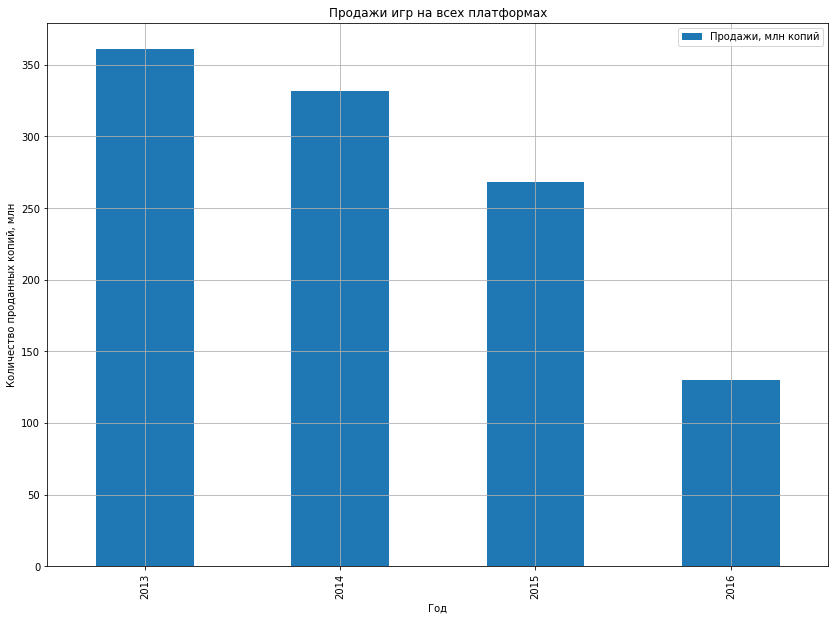

In [11]:
df_good = df.query('year_of_release >= 2013')
sales_overall = df_good.pivot_table(index = 'year_of_release', values = 'total_sales', aggfunc = 'sum')
ax = sales_overall.plot(figsize = (14,10), grid = True, title = f'Продажи игр на всех платформах', kind = 'bar')    
ax.set_xlabel('Год')
ax.legend(['Продажи, млн копий'])
ax.set_ylabel('Количество проданных копий, млн')  



По какой-то причине наблюдается плавное падение продаж из года к год за весь исследуемый период

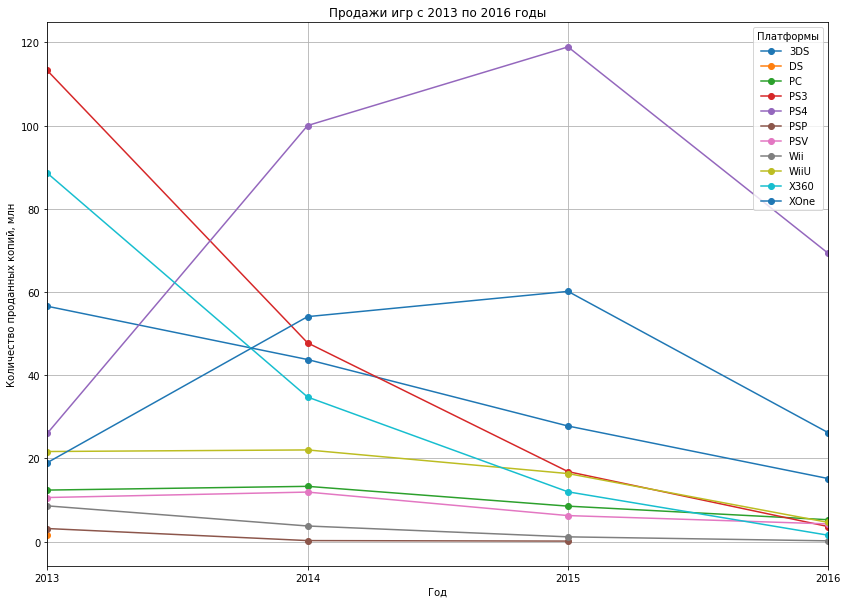

In [12]:
df_good_platforms = pd.pivot_table(df_good, index = 'year_of_release', columns = 'platform', values = 'total_sales', aggfunc = 'sum')

ax = df_good_platforms.plot(figsize = (14,10), grid = True, title = 'Продажи игр с 2013 по 2016 годы', style = 'o-')
ax.set_xticks(range(df_good['year_of_release'].min(),df_good['year_of_release'].max() + 1))
ax.set_xlabel('Год')
ax.set_ylabel('Количество проданных копий, млн')
ax.legend(title='Платформы')

По итогам 2016 года продажи упали абсолютно на всех платформах. В топе по итогам 2016 года: игры для новых консолей <b>PS4</b> и <b>XOne</b>, а также <b>3DS</b>. При этом заметный рост за последние 3 года показали только <b>PS4</b> и <b>XOne</b> - это связано со сменой поколений и массовым переходом игроков с <b>PS3</b> и <b>X360</b>. Все остальные платформы либо стремительно перестают быть интересными для игроков, либо стагнируют.

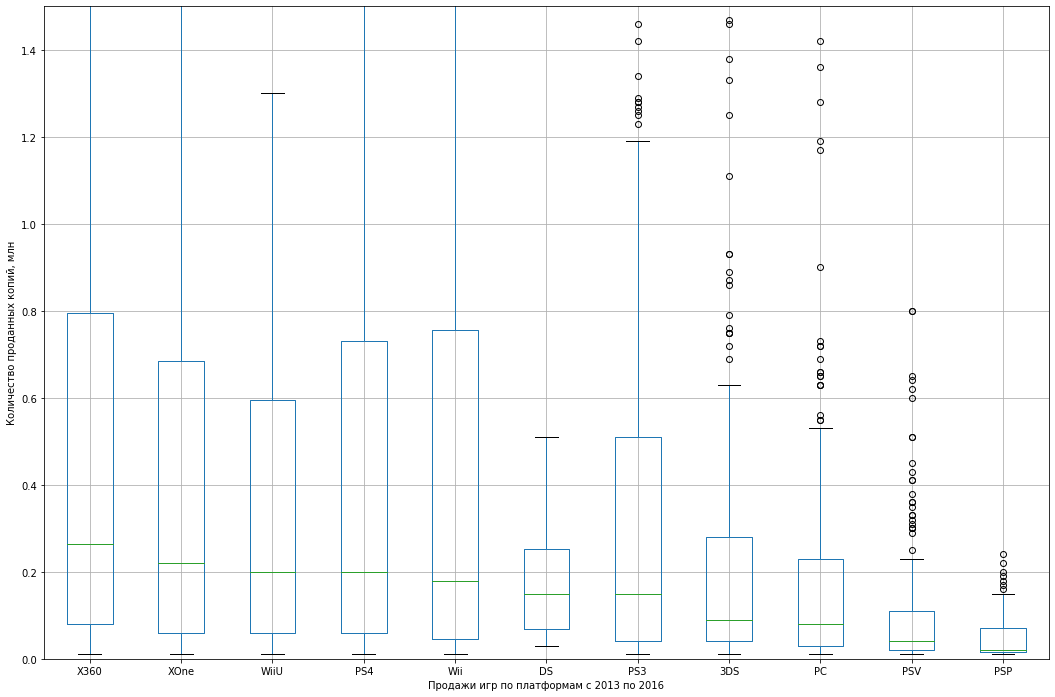

In [13]:

def boxplot_sorted(df, by, column, name, ylim = 0):
    df2 = pd.DataFrame({col:vals[column] for col, vals in df.groupby(by)})
    meds = df2.median().sort_values(ascending = False)
    ax = df2[meds.index].boxplot(figsize = (18,12))
    if ylim != 0:
        ax.set_ylim(ylim)
    ax.set_xlabel(name)
    ax.set_ylabel('Количество проданных копий, млн')
    plt.show()
    
boxplot_sorted(df_good, by=['platform'], column='total_sales', name = 'Продажи игр по платформам с 2013 по 2016', ylim = (0, 1.5))

На большом количестве платформ мы наблюдаем значительную асимметрию графика: медиана гораздо ниже, чем среднее значение. Общие продажи игр обеспечиваются выбросами: чрезвычайно популярными играми (хитами), а в нижней части графика располагается огромное количество игр с минимальным объемом продаж. Чем менее популярна платформа, тем больше выражен этот эффект. <b>Промотируя проект для большой платформы с дорогим SDK и более стабильным качеством выпускаемых проектов (вроде X360, PS3, Wii и т.п.), мы с большей вероятностью получим возврат инвестиций, нежели делая ставку на проекты для небольших платформ.</b>

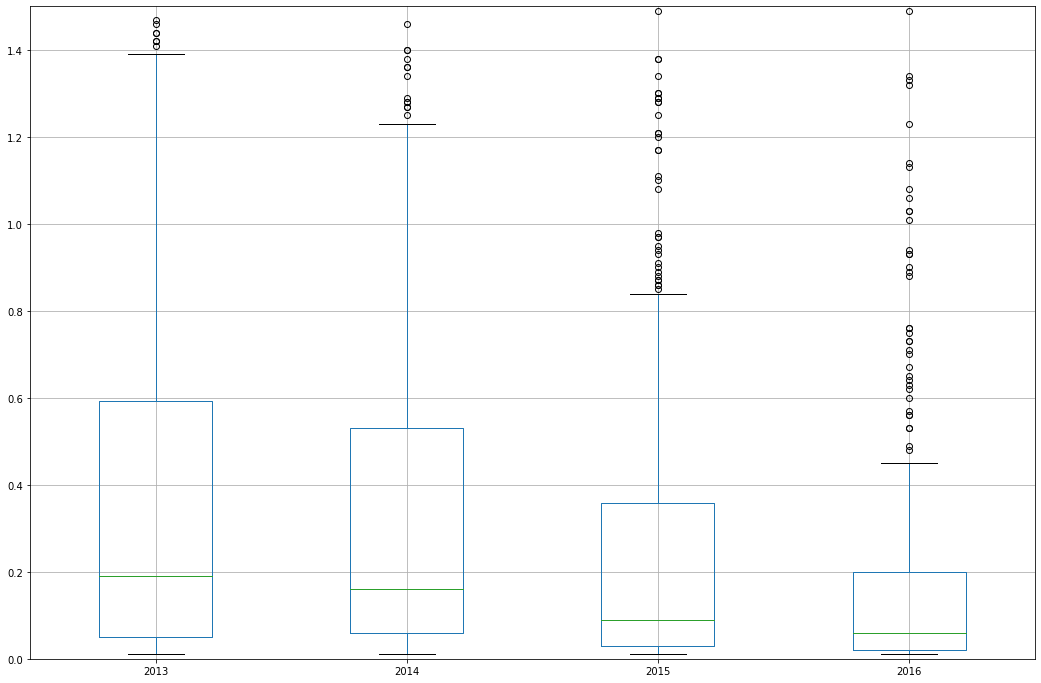

In [14]:
df2 = pd.DataFrame({col:vals['total_sales'] for col, vals in df_good.groupby(['year_of_release'])})
ax = df2.boxplot(figsize = (18,12))
ax.set_ylim(0,1.5)
plt.show()

Как видим, засилье неинтересных людям игр продолжается на протяжении всего исследуемого периода. Тренд негативный: медианные продажи падают, появляется все больше "выбросов", т.е. средняя популярность игр снижается и продажи начинают все больше зависеть от "выстреливающих" тайтлов.

### Влияние ревью и пользовательских оценок

Для анализа влияния оценок критиков и пользователей на продажи игры возьмем платформу с самыми высокими медианными продажами: <b>X360</b>

Коэффициент Пирсона для платформы X360: (оценка пользователей / объем продаж игры): -0.012
Коэффициент Пирсона для платформы X360: (оценка критиков / объем продаж игры): 0.35

Коэффициент Пирсона для всех платформ: (оценка пользователей / объем продаж игры): -0.003
Коэффициент Пирсона для всех платформ: (оценка критиков / объем продаж игры): 0.314


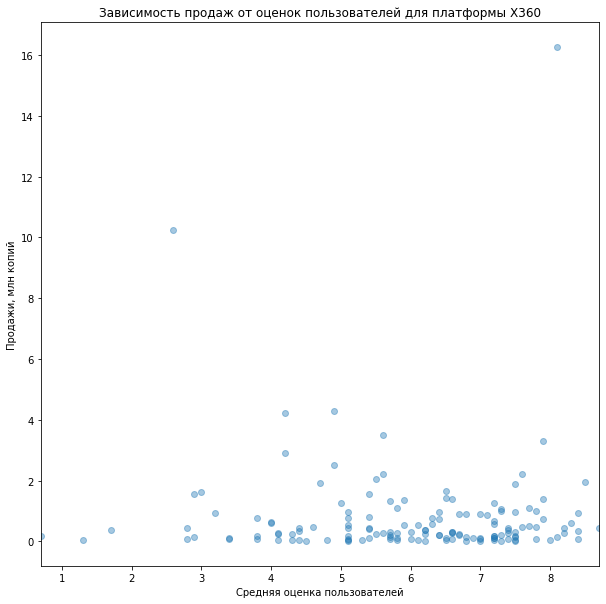

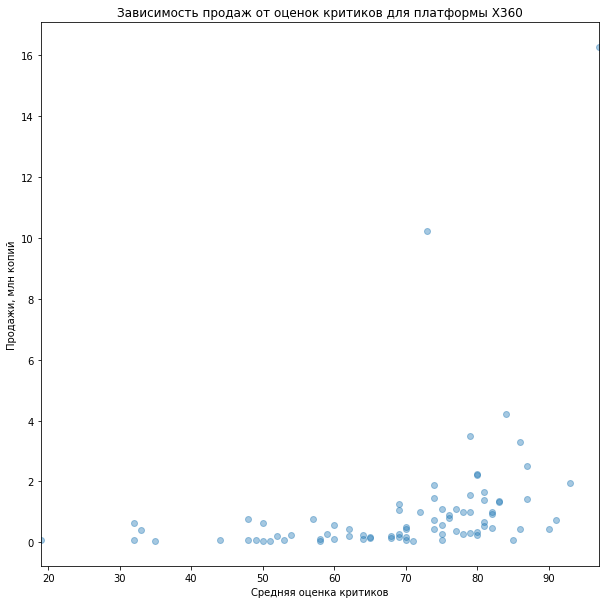

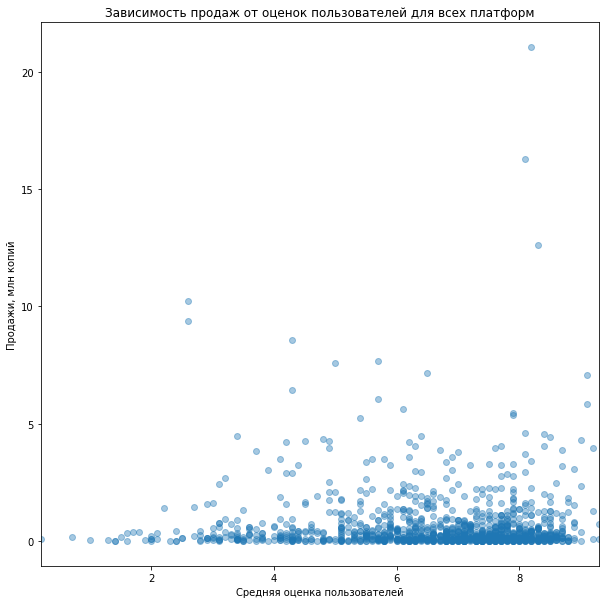

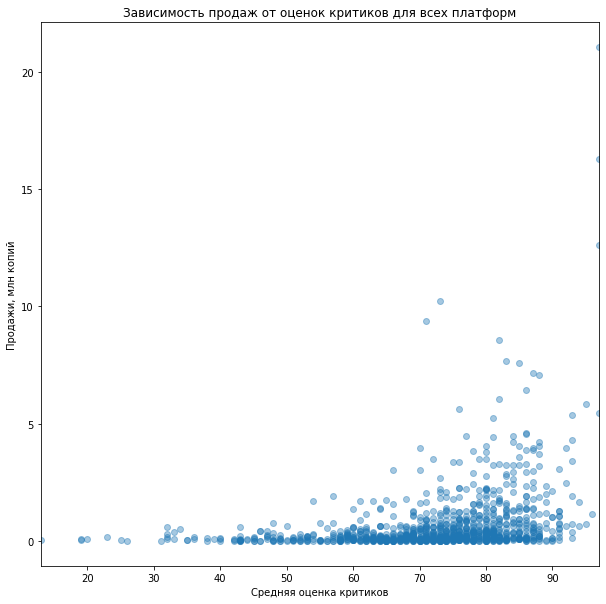

In [15]:

def check_scores_impact(df,platform = None):
    for score in [['user_score', 'пользователей'], ['critic_score', 'критиков']]:       
        if platform != None:
            df_score = df.query('platform == @platform')
            platform_name = f'для платформы {platform}'
        else:
            df_score = df
            platform_name = 'для всех платформ'
        ax = df_score.plot(title = f'Зависимость продаж от оценок {score[1]} {platform_name}',\
            y = 'total_sales', x = score[0], style = 'o', figsize = (10,10), alpha = 0.4, legend = False)
        ax.set_ylabel('Продажи, млн копий')
        ax.set_xlabel(f'Средняя оценка {score[1]}')
        print(f'Коэффициент Пирсона {platform_name}: (оценка {score[1]} / объем продаж игры): {round(df_score["total_sales"].corr(df_score[score[0]]),3)}')

check_scores_impact(df_good, 'X360')
print()
check_scores_impact(df_good)

По диаграмме рассеяния и коэффициенту Пирсона мы можем сделать следующие выводы о степени влияния оценок на продажи игры:
 - <b>Пользовательские оценки</b> практически не оказывают влияния на продажи игры
 - <b>Оценки критиков</b> оказывают умеренное влияние на продажи игры. Что характерно, практически все "выстрелившие" игры на X360, имеют среднюю оценку критиков от 70 и выше.

In [16]:
def analyze_sales(region_index, region_name):
    try:
        df_good_genre = df_good.pivot_table(index = 'genre', values = region_index, aggfunc = 'sum').sort_values(by = region_index, ascending = False)
    except:
        print('Ошибка в переменной region_index')
        return(0)      
    df_good_genre = df_good_genre[0:5] 
    ax = df_good_genre.plot(kind = 'pie', figsize = (8,8), subplots = True, \
        grid = True, autopct='%1.1f%%',  title = f'Распределение проданных копий по жанрам 2013-2016 ({region_name})', legend = False)                
    top5_genres = set(df_good_genre[0:5].index)
    plt.show() 
    
    limit = df_good.query('genre.isin(@top5_genres)')[region_index].quantile(0.98)
    boxplot_sorted(df_good.query('genre.isin(@top5_genres)'), by=['genre'], column=region_index, name = f'Продажи игр по жанрам ({region_name})', ylim = (0,limit))
    
    df_platforms = df_good.pivot_table(index = 'platform', values = region_index, aggfunc = 'sum').sort_values(by = region_index, ascending = False)
    df_platforms = df_platforms[0:5]    
    ax = df_platforms.plot(kind = 'bar',\
        figsize = (8,8), grid = True, title = f'Распределение продаж по платформам 2013 - 2016 ({region_name})')
    ax.set_xlabel('Год')
    ax.set_ylabel('Количество проданных копий, млн')
    ax.legend(['Продажи, млн копий'])    
    plt.show()
    
    top5_platforms = set(df_platforms[0:5].index)
    limit = df_good.query('platform.isin(@top5_platforms)')[region_index].quantile(0.98)
    boxplot_sorted(df_good.query('platform.isin(@top5_platforms)'), by=['platform'], column=region_index, name = f'Продажи игр по платформам ({region_name})', ylim = (0,limit))
    
    df_good_ersb = df_good[df_good[region_index] > 0].groupby('rating').agg({region_index:'count'}).sort_values(by = region_index, ascending = False)
    ax = df_good_ersb.plot(kind = 'bar',\
        figsize = (8,8), grid = True, title = f'Количество тайтлов ESRB ({region_name})')
    ax.set_xlabel('Рейтинг ESRB')
    ax.set_ylabel('Количество игр')
    ax.legend(['Количество игр'])   
    
    df_good_ersb = df_good[df_good[region_index] > 0].groupby('rating').agg({region_index:'median'}).sort_values(by = region_index, ascending = False)
    ax = df_good_ersb.plot(kind = 'bar',\
        figsize = (8,8), grid = True, title = f'Медианные продажи игр по рейтингу ESRB ({region_name})')
    ax.set_xlabel('Рейтинг ESRB')
    ax.set_ylabel('Медианное количество проданных копий, млн')
    ax.legend(['Продажи, млн копий'])   

### Анализ продаж (все регионы)

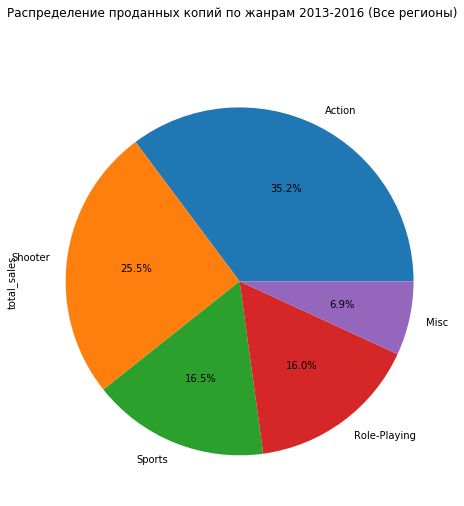

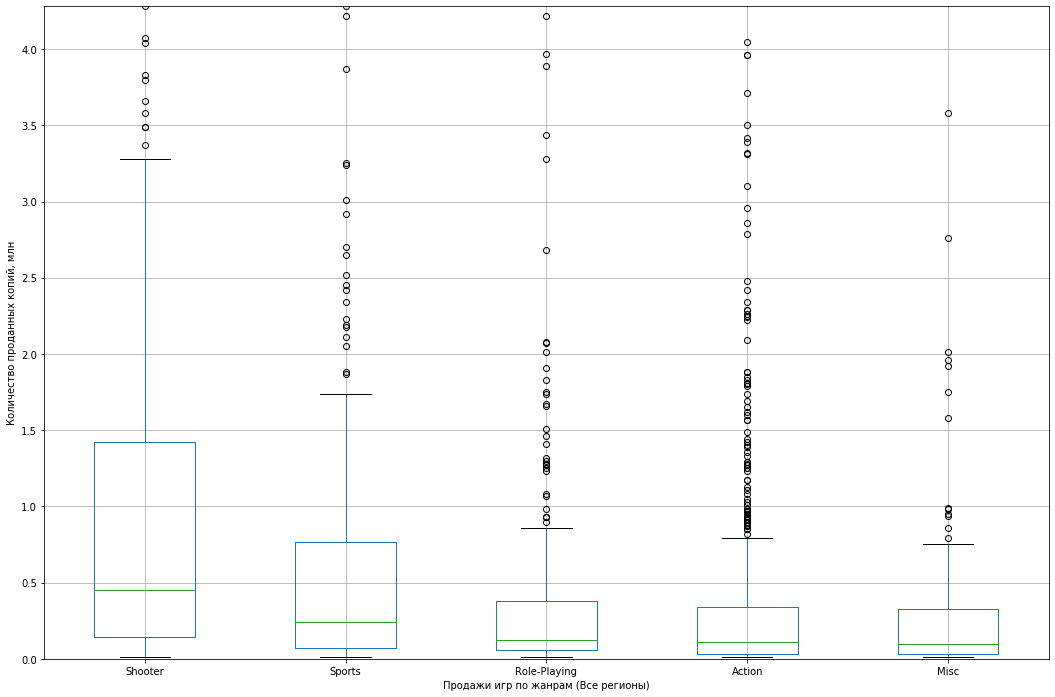

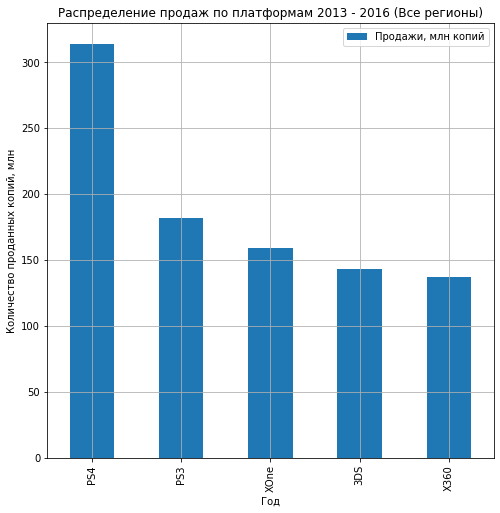

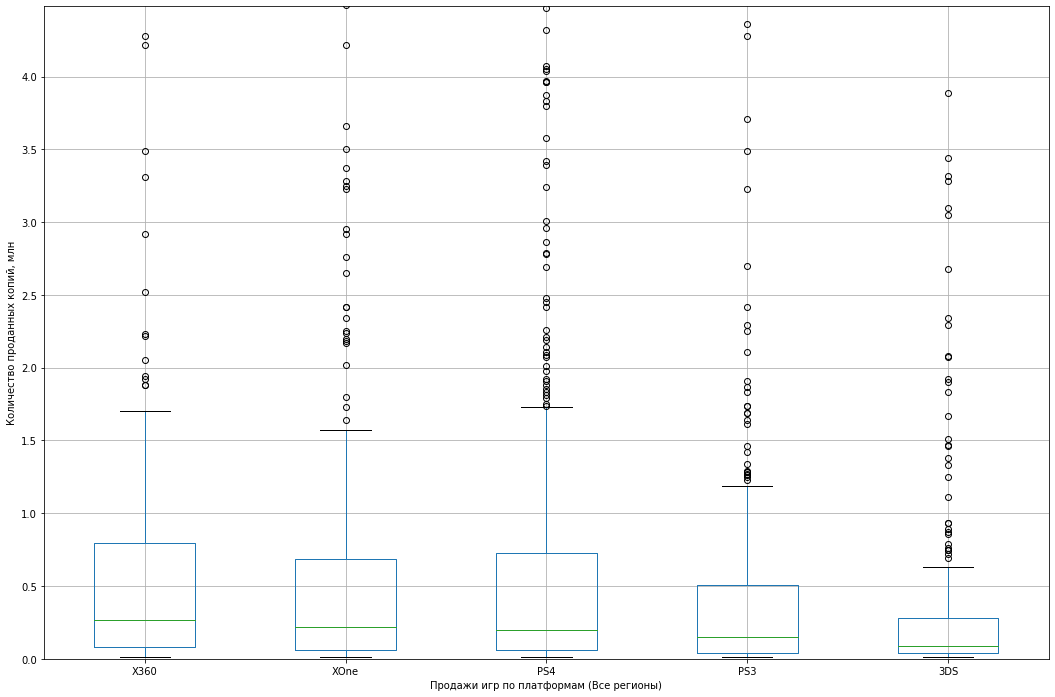

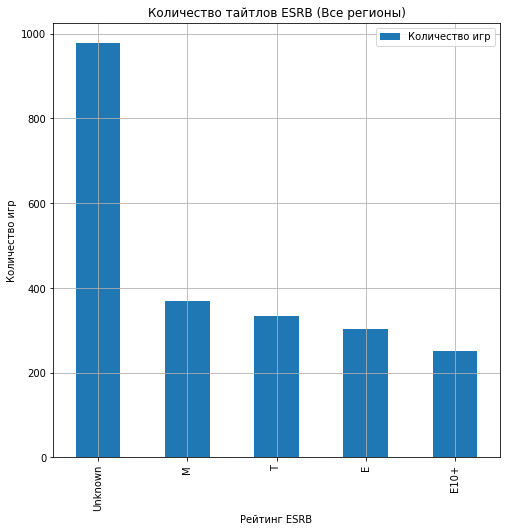

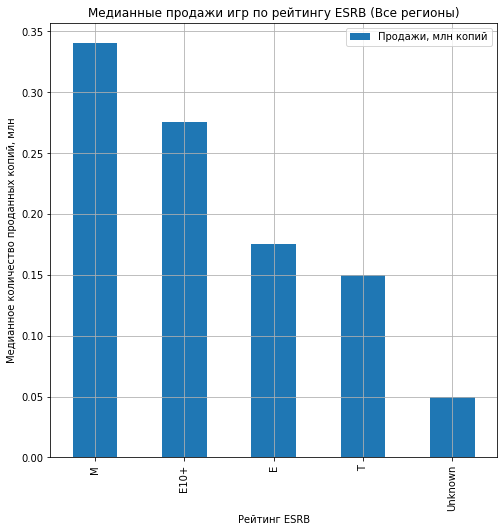

In [17]:
analyze_sales('total_sales', 'Все регионы')

ТОП-5 жанров по суммарным продажам в 2013-2016 годах выглядит следующим образом:

 - Экшены
 - Шутеры
 - Спортивные игры 
 - РПГ
 - Miscellaneous Games (здесь и далее примем, что это категория казуальных игр)
 
Неcмотря на высокие суммарные продажи жанра Экшен, игры в данной категории - не лучший вариант для маркетингового продвижения. Как мы видим на графике boxplot, медианные продажи являются достаточно низкими: общий результат жанра обеспечивается большим количеством тайтлов в продаже и немногочисленными хитами. Наиболее стабильными по продажам и интересными для нас жанрами являются <b>Шутеры</b> и <b>Спортивные игры</b>.

ТОП-5 консолей за тот же период:
 - PS4 
 - XOne
 - 3DS
 - PS3
 - X360
 
Как мы выяснили ранее, в данный момент происходит смена поколений консолей Microsoft и Sony. По графику видно, что новая консоль <b>PS4</b> стартовала гораздо успешнее, чем <b>XOne</b>: продажи выше в 2 раза, несмотря на то что запуск обеих консолей произошел одновременно.

При этом на графике boxplot мы можем наблюдать, что игры на <b>X360</b>, <b>PS4</b> и <b>XOne</b> бывают успешны примерно с равной вероятностью. Вместе с тем, на <b>PS3</b> чаще встречаются "мусорные" тайтлы, а наиболее рискованной для инвестиций в маркетинг является <b>3DS</b>.

По рейтингу ESRB рынок предлагает примерно близкое количество тайтлов с разными возрастными рейтингами, однако мы можем наблюдать очень большое количество игр без возрастного рейтинга (постараемся выяснить природу этого явления в анализе продаж по регионам). Лучшие медианные продажи демонстируют игры категории <b>M</b> и <b>E10+</b>.

### Анализ продаж (Северная Америка)

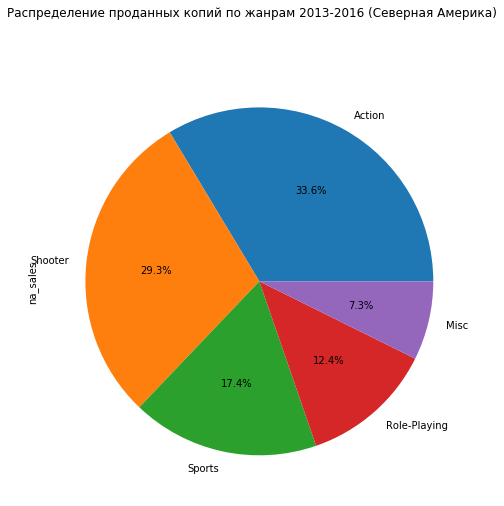

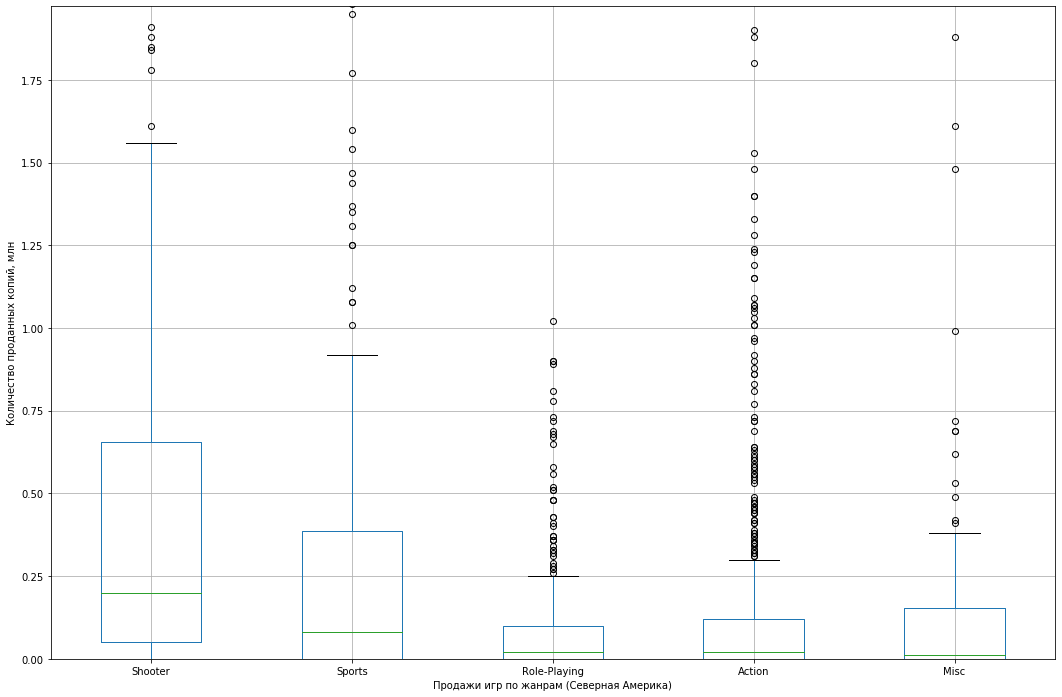

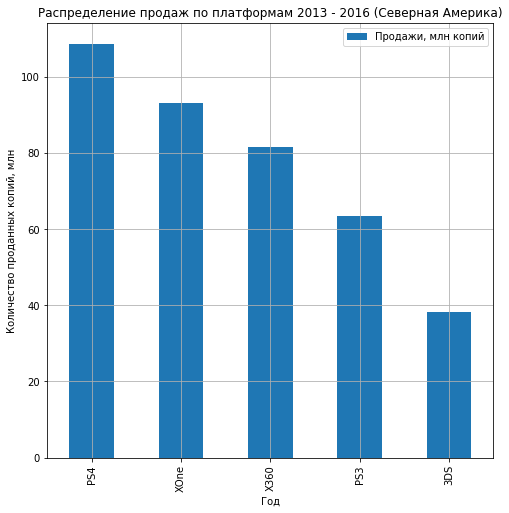

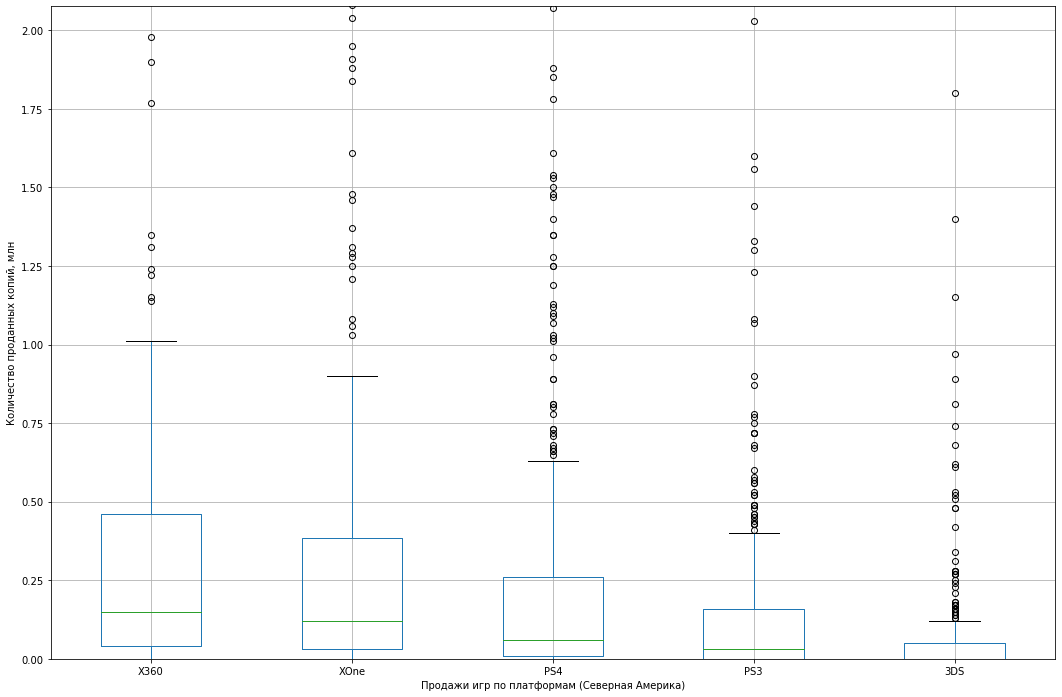

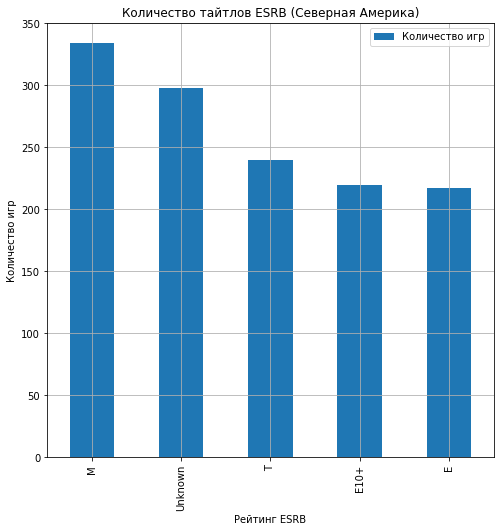

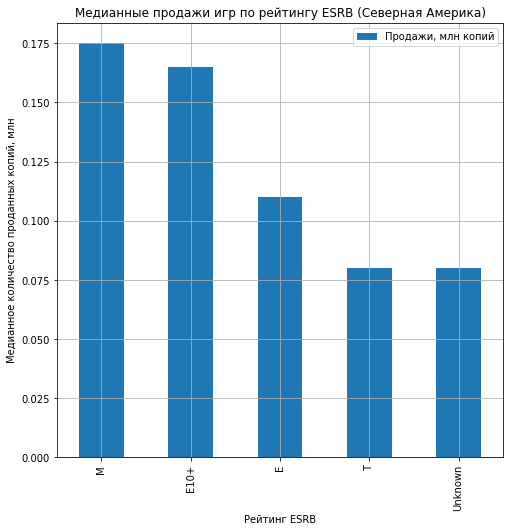

In [18]:
# оцениваем североамериканский рынок

analyze_sales('na_sales', 'Северная Америка')

Жанровые предпочтения североамериканских геймеров полностью повторяют описанные выше общемировые тенденции: <b>экшены, спортивные игры, шутеры, "казуалки" и РПГ</b>. Стабильнее всего продаются <b>Шутеры</b> и <b>Спортивные игры</b>.

Перечень ТОП-5 предпочитаемых платформ также идентичен общемировому, однако есть важное отличие: в Северной Америке <b>XOne</b> стартовала гораздо лучше, чем в среднем по миру. Продажи игр на этой платформе лишь незначительно отстают от <b>PS4</b>. Видимо, сказывается, лояльность аудитории к "местной" Microsoft.

По возрастному рейтингу мы можем наблюдать перекос в сторону тайтлов для взрослых (<b>M</b>), а по медианным продажам, так же как и в мире, лидируют игры с рейтингами <b>M</b> и <b>E10+</b>.

### Анализ продаж (Европа)

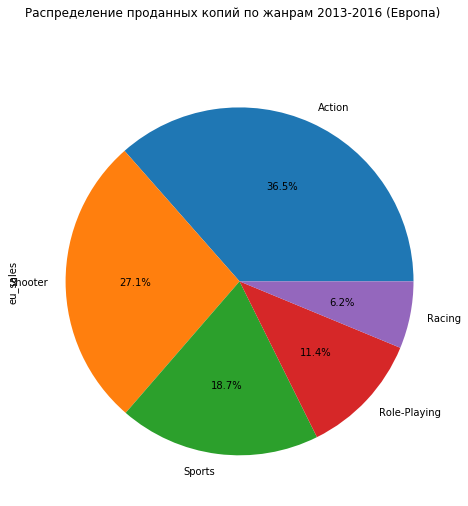

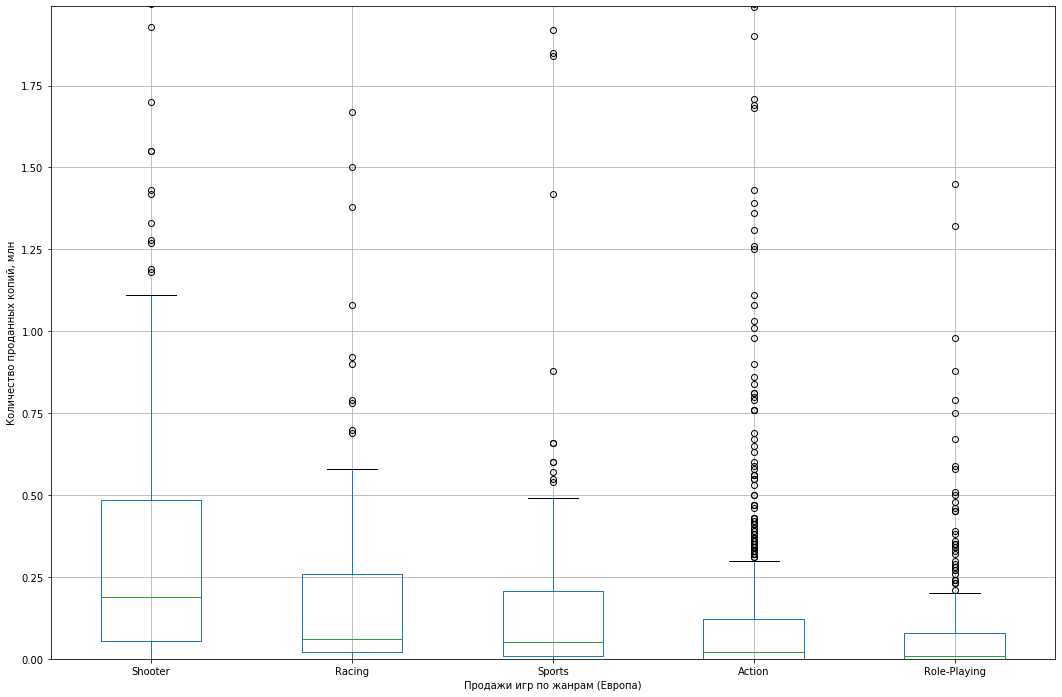

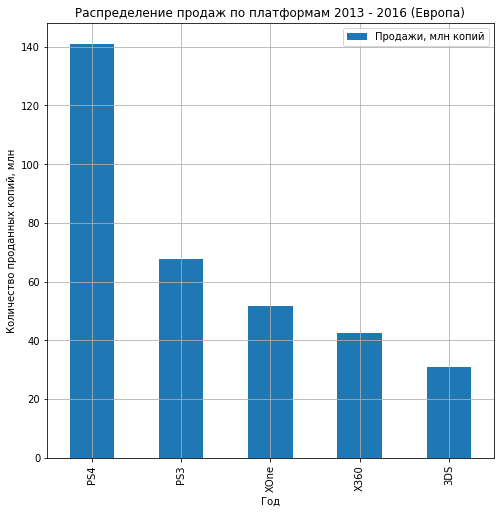

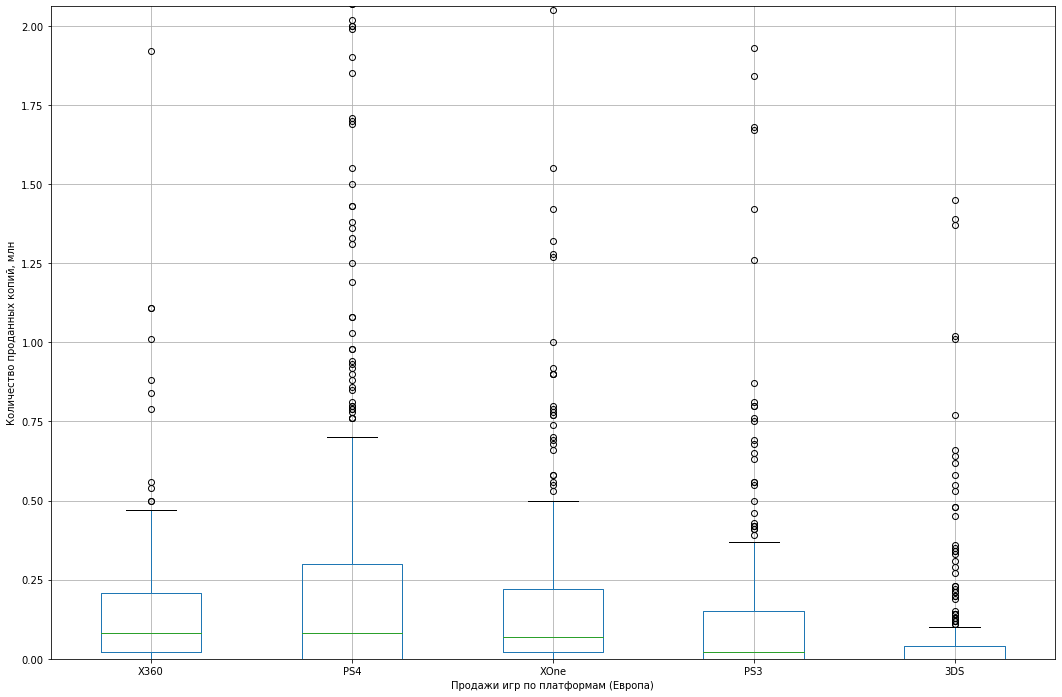

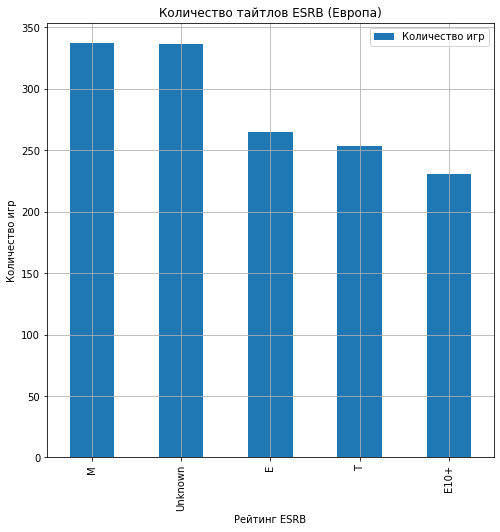

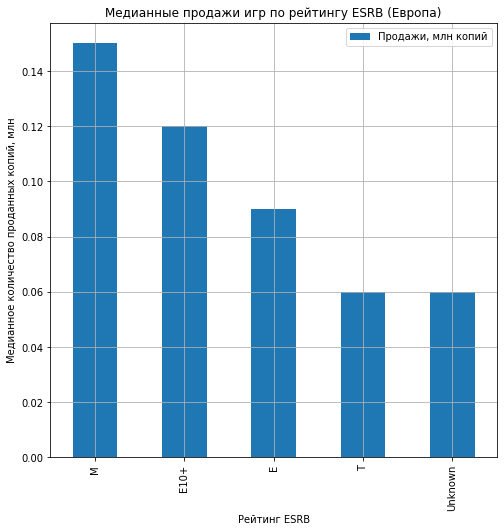

In [19]:
analyze_sales('eu_sales', 'Европа')

Распределение жанров на рынке Европы с 1 по 4 места не преподносит сюрпризов: <b>экшены, спортивные игры, шутеры и "казуалки"</b>. Тенденции схожи с общемировыми и североамериканскими. Специфично для Европы 5-е место: <b>гоночные игры</b>. Несмотря на невысокие суммарные продажи (сказывается небольшое количество выпускаемых игр), игры в этом жанре продаются не менее стабильно, чем <b>Спортивные игры</b>. А наиболее стабильным жанром, как и в предыдущих блоках, являются <b>Шутеры</b>

Говоря о платформах, стоит отметить тотальное доминирование в Европе компании <b>Sony</b>. <b>PS4</b> лидирует по продажам с очень большим отрывом. На втором месте - тоже консоль Sony: <b>PS3</b>, немного опережающая <b>XOne</b> и <b>X360</b>. Вместе с тем стоит отметить, что игры на <b>PS3</b> за исследуемый период нередко проваливались в продажах, а хуже всего на графике boxplot выглядит <b>3DS</b> - ее присутствие в ТОП-5 Европы практически полностью обеспечено "выстрелившими" играми.

Что касается рейтинга ESRB, европейский рынок в целом схож с североамериканским. Отличием является большое количество игр <b>без рейтинга</b>: их ровно столько же, сколько и игр <b>для взрослых</b>. По медианным продажам европейский рынок не преподносит сюрпризов. В ТОП-3 игры жанров <b>M</b>, <b>E10+</b> и <b>E</b>. 

### Анализ продаж (Япония)

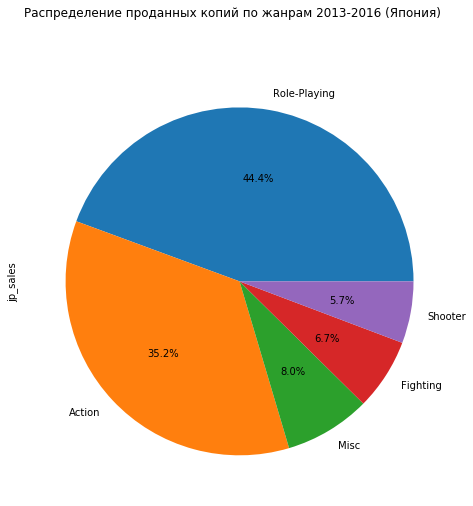

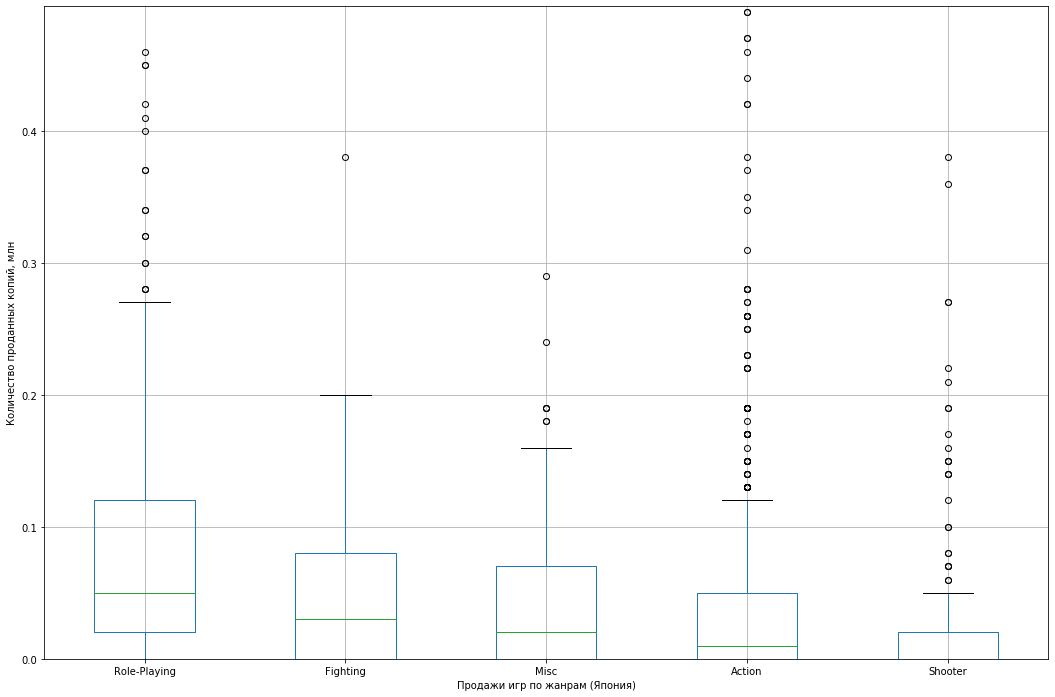

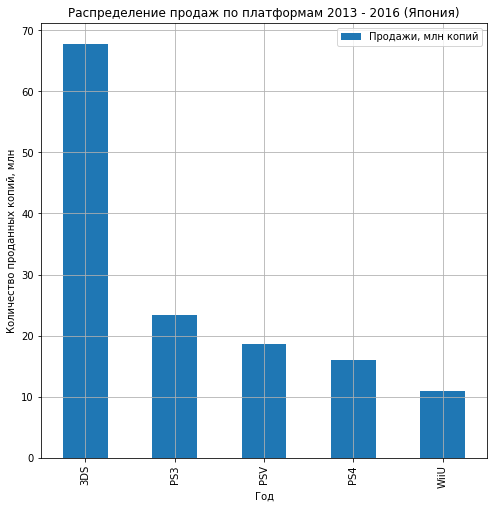

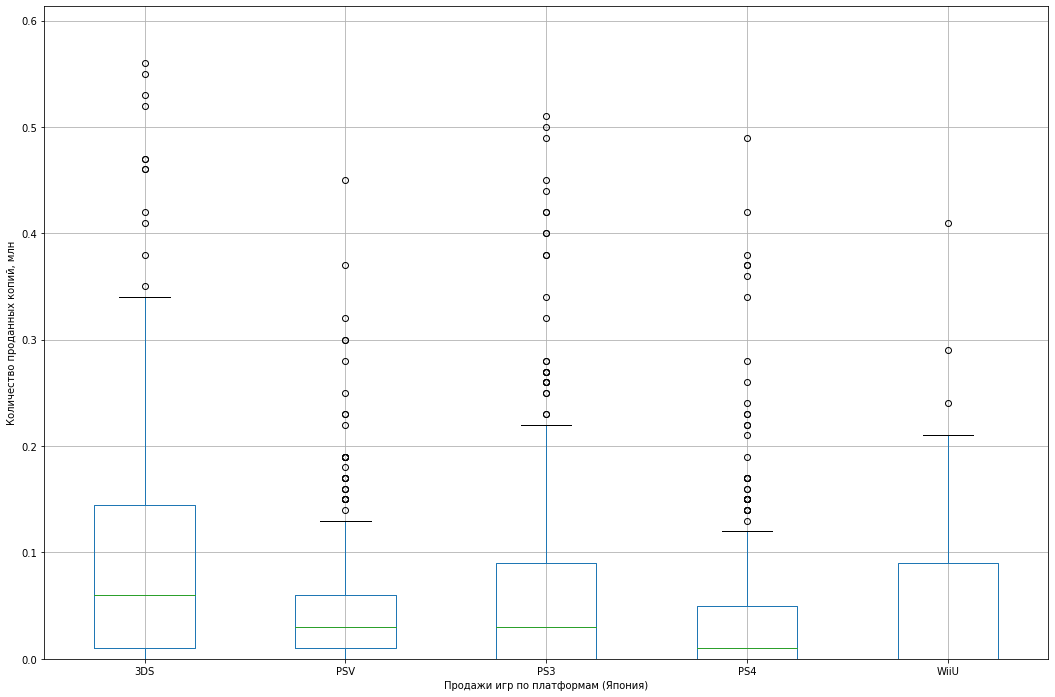

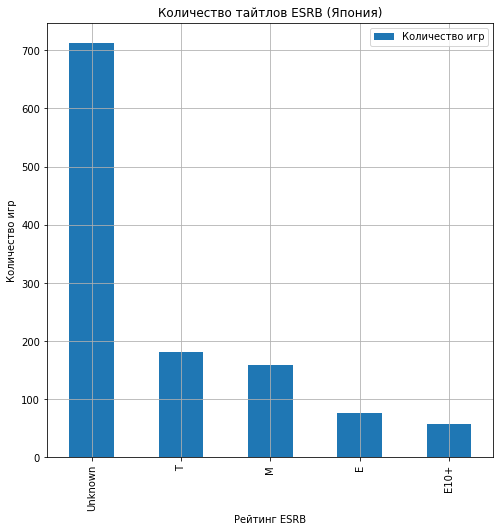

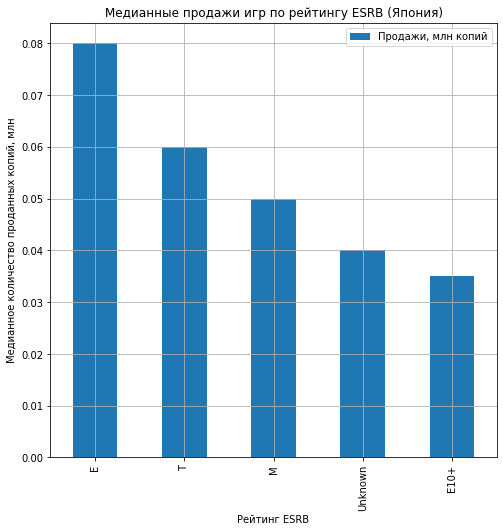

In [20]:
analyze_sales('jp_sales', 'Япония')

Японский рынок имеет ярко выраженную специфику во всех аспектах.

По жанрам. По суммарным продажам лидируют <b>Ролевые игры</b>. Также очень большую долю рынка занимают <b>Экшены</b>. Игры этих двух жанров составляют практически <b>80%</b> продаж в Японии. Оставшийся объем заполнили в сопоставимых пропорциях <b>Файтинги</b>, <b>Казуальные игры</b> и <b>Шутеры</b>.

При этом на графике boxplot мы видим, что наибольшие медианные продажи имеют <b>Ролевые игры</b>, <b>Файтинги</b> и <b>Казуальные игры</b>. В то время как <b>Экшены</b> и <b>Шутеры</b> (прекрасно продающиеся в других регионах) "выстреливают" в Японии крайне редко.

Что касается платформ, на японском рынке с огромным отрывом лидирует <b>3DS</b>. Причем игры на этой платформе гораздо чаще показывают хорошие результаты по продажам, нежели тайтлы для 4-х других платформ из рейтинга.

Возрастной рейтинг также специфичен. Мы видим, что в Японии продается огромное количество тайтлов без рейтинга ESRB. Поскольку западные разработчики обязаны получать этот рейтинг перед релизом их игр, мы можем сделать вывод, что игры с рейтингом <b>Unknown</b> в нашем исследовании - это продукция местных японских инди-разработчиков.

Стоит отметить, что игры без рейтинга не пользуются в Японии колоссальной популярностью, судя по медианным продажам. Наибольший спрос мы наблюдаем на игры с рейтингом <b>Everyone</b>, а на 2-3 местах <b>Teen</b> и <b>Mature</b>

### Проверка статистических гипотез

Далее проверим гипотезы в соответствии с ТЗ.

Попробуем оценить, является ли статистически значимой разница между средними пользовательскими рейтингами платформ <b>Xbox One</b> и <b>PC</b>.

Гипотеза H₀: средние рейтинги платформ Xbox One и PC - одинаковые

Альтернативная гипотеза H₁: средние рейтинги платформ Xbox One и PC - различаются

In [21]:
stats = pd.DataFrame(columns = ['XOne','PC'])

xone_sample = df_good[df_good['platform'] == 'XOne']['user_score'].dropna()
pc_sample = df_good[df_good['platform'] == 'PC']['user_score'].dropna()

xone_sample.name = 'XOne'
pc_sample.name = 'PC'

# посчитаем и выведем на экран дисперсию, среднее и среднеквадратичное отклонение

for sample in [xone_sample,pc_sample]:
    stats.loc['var', sample.name] = round(np.var(sample, ddof = 1))
    stats.loc['mean', sample.name] = round(sample.mean(),2)
    stats.loc['std', sample.name] = round(np.std(sample),2)

display(stats)

,XOne,PC
var,2,3
mean,6.52,6.27
std,1.38,1.74


In [22]:

alpha = 0.05  # критический уровень статистической значимости установим на уровне 5%

results = st.ttest_ind(xone_sample, pc_sample, equal_var = False)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-значение: 0.14759594013430463
Не получилось отвергнуть нулевую гипотезу


Таким образом нам не удалось отвергнуть нулевую гипотезу. Средний рейтинг платформ Xbox One и PC не является статистически различимым. Скорее всего это связано с пересечением тайтлов: большим количеством мультиплатформенных игр на XOne и PC.

Теперь проверим, является ли статистически значимой разница между средними пользовательскими рейтингами игр жанра <b>Action</b> и <b>Sports</b>.

Гипотеза H₀: средние рейтинги игр в жанре Action и Sports - одинаковые

Альтернативная гипотеза H₁: средние рейтинги игр в жанре Action и Sports  - различаются

In [23]:
stats = pd.DataFrame(columns = ['Action','Sports'])

action_sample = df_good[df_good['genre'] == 'Action']['user_score'].dropna()
sports_sample = df_good[df_good['genre'] == 'Sports']['user_score'].dropna()

action_sample.name = 'Action'
sports_sample.name = 'Sports'

for sample in [action_sample,sports_sample]:
    stats.loc['var', sample.name] = round(np.var(sample, ddof = 1))
    stats.loc['mean', sample.name] = round(sample.mean(),2)
    stats.loc['std', sample.name] = round(np.std(sample),2)

display(stats)

,Action,Sports
var,2,3
mean,6.84,5.24
std,1.33,1.78


In [24]:
# проверим гипотезу о том, что пользовательские рейтинги платформ Xbox One и PC одинаковые


alpha = 0.05  # критический уровень статистической значимости установим на уровне 5%

results = st.ttest_ind(action_sample, sports_sample, equal_var = False)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-значение: 1.4460039700704315e-20
Отвергаем нулевую гипотезу


В данном случае нам не удалось подтверить нулевую гипотезу. Согласно проведенному тесту, статистически значимая разница между рейтингами игр Action и Sports - может присутствовать.

## Вывод

Мы проанализировали базу данных с продажами видоигр за период <b>с 2013 по 2016 годы</b> в разрезе как общемировых тенденций, так и с точки зрения региональной специфики.

В ходе анализа мы выявили следующие тенденции всего рынка видоигр:
 - Рынок падающий. Спад продаж на рынках Северной Америки и Европы происходит гораздо быстрее, чем на видеоигровом рынке Японии.
 - Наиболее перспективные игровые платформы: <b>XOne, PS4 и DS3</b>. Продажи игр для других платформ, либо падают, либо находятся в стагнации
 - ТОП 5 самых продаваемых жанров (в порядке убывания) - <b>Экшены, Спортивные игры, Шутеры, Казуальные игры и Ролевые игры</b>. При этом по средним продажам с хорошим отрывом лидируют <b>Шутеры и Спортивные игры</b> - если не принимать во внимание региональную специфику, это лучшие жанры для инвестиций в продажи. А наиболее рискованным для промотирования жанром являются <b>Экшены</b> - таких игр производится больше всего на рынке, а продажи в пересчете на одну игру оставляют желать лучшего, поэтому отбор игр в этом жанре должен быть максимально консервативным.
 - Самые высокие медианные продажи имеют игры категории <b>Для взрослых</b>
 - Пользовательские оценки не оказывают никакого влияния на продажи игр
 - Оценки критиков оказывают умеренное влияние на продажи игр. Почти все коммерчески успешные хиты имеют <b>от 70 и выше</b> баллов от критиков.
 - Мы не смогли подтвердить, что средние пользовательские оценки для платформ <b>PC</b> и <b>Xbox One</b> отличаются.
 - Средние пользовательские оценки для жанров <b>Action</b> и <b>Sports</b> отличаются.
 
Проведя анализ региональных тенденций, мы можем сформировать портрет успешных игр для разных регионов для оценки целесообразности промотирования игр.

Успешный проект для рынка <b>Северной Америки</b> выглядит следующим образом:
 - Платформа - <b>PS4 / XOne</b>. Опционально - <b>X360</b> (но продажи падают)
 - Жанр - <b>Shooter / Sports</b>
 - Возрастной рейтинг - <b>Mature</b>, <b>E10+</b> или <b>E</b>
 
Успешный проект для рынка <b>Европы</b>:
 - Платформа - <b>PS4</b> (предпочтительно), <b>XOne / X360</b> (опционально)
 - Жанр - <b>Racing / Shooter / Sports</b> 
 - Возрастной рейтинг - <b>Mature</b>, <b>E10+</b> или <b>E</b>
 
Успешный проект для рынка <b>Японии</b>:
 - Платформа - <b>3DS</b>
 - Жанр - <b>Role Playing Game, Фатинг</b> или <b>Казуальная игра</b>
 - Возрастной рейтинг - <b>Everyone</b> или <b>Teen</b>. Игры со взрослыми и детскими рейтингами в Японии продаются хуже